In [2]:
#hide
import fastbook
fastbook.setup_book()

In [34]:
from fastbook import *
from fastai.vision.widgets import *
import os

In [35]:
# Path to train set
trsPath = Path("/home/dudi/privet/med/deeplearning/imgdb/train_set")
trainFiles = get_image_files(trsPath)
print (f"Found - {len(trainFiles)} images in train set")

Found - 1263 images in train set


In [36]:
#check if images are corrupted
failed = verify_images(trainFiles)
failed

(#0) []

In [37]:
value = os.getenv("CUDA_VISIBLE_DEVICES")
print(value)

None


In [38]:
slices = DataBlock(blocks=(ImageBlock, CategoryBlock),
                        get_items=get_image_files,
                        splitter=RandomSplitter(valid_pct=0.2, seed=42),
                        get_y=parent_label,
                        item_tfms=Resize(256))

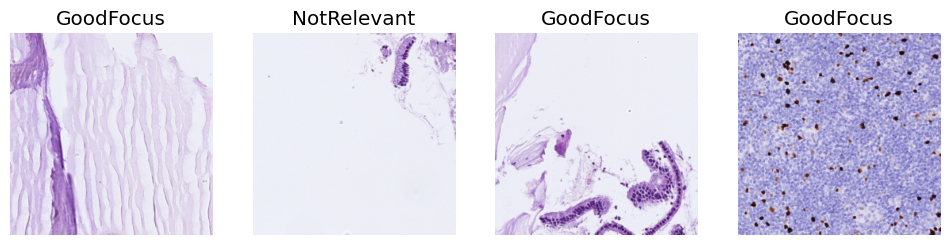

In [39]:
dls = slices.dataloaders(trsPath)
dls.valid.show_batch(max_n=4, nrows=1, unique=False)

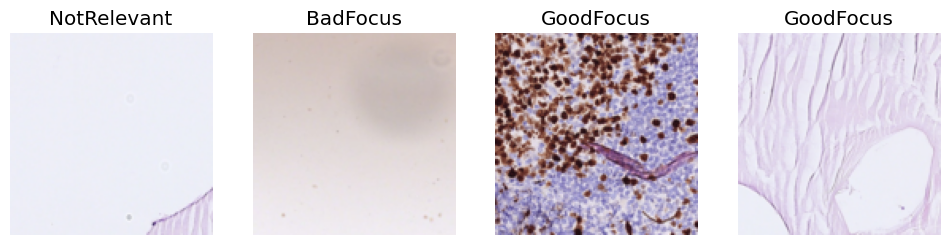

In [40]:
slices = slices.new(item_tfms=RandomResizedCrop(128))
dls = slices.dataloaders(trsPath)
dls.train.show_batch(max_n=4, nrows=1, unique=False)

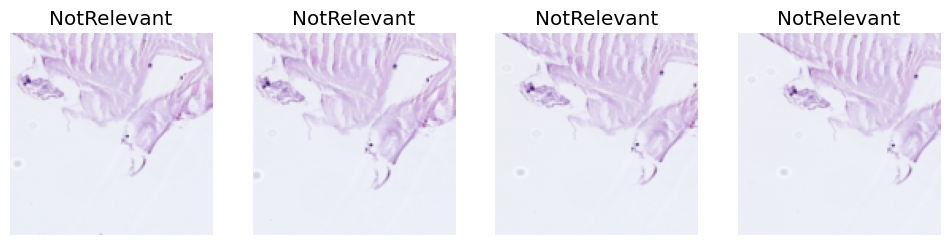

In [41]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [43]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.325788,0.857506,0.234127,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.968589,0.620570,0.206349,00:04
1,0.948685,0.538217,0.222222,00:04
2,0.924066,0.535544,0.198413,00:04
3,0.845368,0.542539,0.174603,00:04
4,0.768474,0.484831,0.174603,00:04
5,0.700355,0.479297,0.150794,00:04
6,0.637825,0.485861,0.158730,00:04
7,0.591638,0.463783,0.158730,00:04
8,0.566611,0.452962,0.158730,00:04
9,0.550158,0.465963,0.154762,00:04


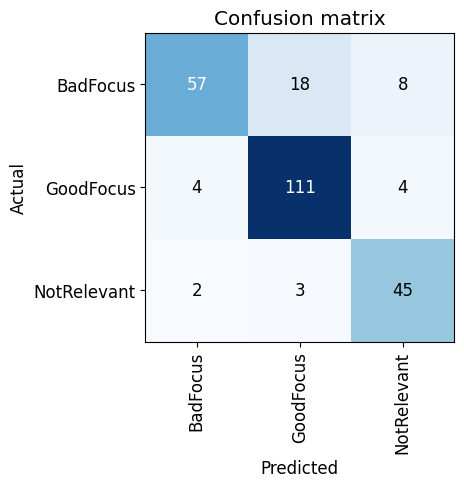

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

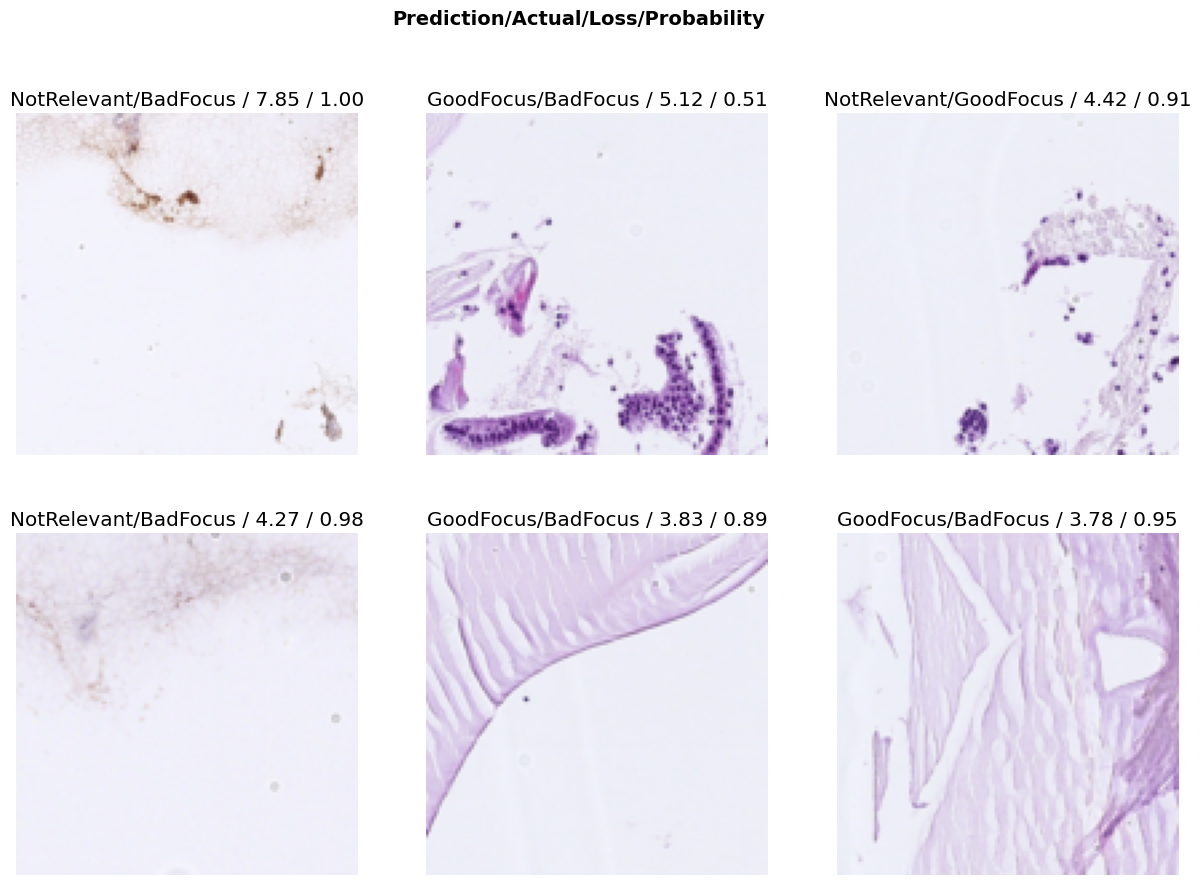

In [45]:
interp.plot_top_losses(6, nrows=2, figsize=(15,10))

In [46]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner 

In [48]:
os.makedirs("/home/dudi/privet/med/deeplearning/model", exist_ok=True)
learn.export("/home/dudi/privet/med/deeplearning/model/resize_256_resnet50_epoc10.pkl")